In [1]:
from urllib.request import urlretrieve
import os
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
## Method number 1

def download_file(file_link: str, output_file: str='file.csv'):
    """
    Downloads a file from an URL into the /downloads directory on your hard drive.
    
    Parameters
    ------------
    file_link: str
        A string containing the link to the file you wish to download.
    output_file: str
        A string containing the name of the output file. The default value is 'file.csv'
        at the location you are running the function.
        
    Returns
    ---------
    Nothing
    
    
    Example
    ---------
    download_file("https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip", output_file='student.zip')
    """
    
    # If file doesn't exist, download it. Else, print a warning message.
    if not os.path.exists(f"../downloads/{output_file}"):
        urlretrieve(file_link, filename=f"../downloads/{output_file}")
    else:
        print("File already exists!")

In [2]:
target_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip"
target_file = "data.zip"

In [3]:
download_file(target_url, target_file)

In [5]:
# method number 2
#- [ ] Another method will read the .csv file with hourly aggregations inside the .zip file in the __downloads/__ directory into a pandas datframe which will become an attribute of your __Class__.


import zipfile

# zip_contents is now an object to handle this particular zip file
zip_contents = zipfile.ZipFile(f"../downloads/{target_file}")

zip_contents.namelist()

['Readme.txt', 'day.csv', 'hour.csv']

In [12]:
import pandas as pd


def zip_to_dataframe(target_file: str, csv_file: str):
    """
    Creates a pandas dataframe from a csv file inside a specifc zip archive (within your /downloads directory)
    
    Parameters
    ------------
    target_file: str
        A string containing the file name of the zip file you downloaded
    csv_file: str
        A string containing the name of csv file you intend to load into the dataframe
        
    Returns
    ---------
    Nothing
    
    
    Example
    ---------
    zip_to_dataframe("data.zip", csv_file="day.csv", dataframe_name="daydf")
    """
    
    zip_contents = zipfile.ZipFile(f"../downloads/{target_file}")
    df = pd.read_csv(zip_contents.open(csv_file))
    return df

In [13]:
zip_to_dataframe(target_file,"day.csv")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [9]:
df

NameError: name 'df' is not defined

In [3]:
zip_contents = zipfile.ZipFile(f"../downloads/data.zip")
df = pd.read_csv(zip_contents.open("hour.csv"))

In [4]:
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [ ]:
month, humidity, weather situation, temperature, windspeed, and total number of bike rentals

<AxesSubplot:>

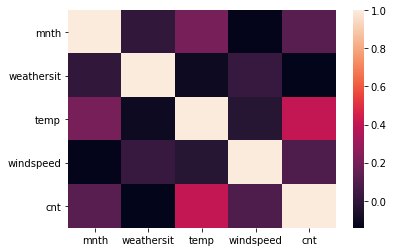

In [7]:
sns.heatmap(df[["mnth", "weathersit", "temp", "windspeed", "cnt"]].corr())

Add a final method to the class that allows you to pick a week number between 0 and 102 weeks. If the chosen number is not in the [0, 102] range the method should __raise__ a ValueError and warn the user of the allowed range. If everything is OK, the method should then plot the chosen week. Use 'instant' for __x__ and 'cnt' for __y__. Remember to put labels in the axis and also a title

<AxesSubplot:xlabel='instant'>

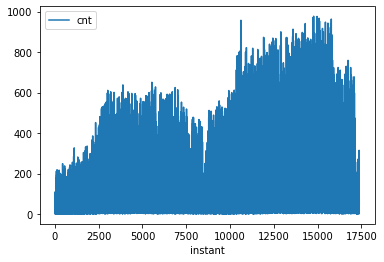

In [10]:
df.plot("instant", "cnt")

In [ ]:
df.loc[df["eel"]]

In [11]:
dates = df.dteday

In [15]:
dates

0        2011-01-01
1        2011-01-01
2        2011-01-01
3        2011-01-01
4        2011-01-01
            ...    
17374    2012-12-31
17375    2012-12-31
17376    2012-12-31
17377    2012-12-31
17378    2012-12-31
Name: dteday, Length: 17379, dtype: object

In [21]:
valueList = list(range(0,102,1))

In [32]:

keyList = list(dict.fromkeys(dates))

import datetime
from datetime import datetime

for date in keyList:
    week = datetime.strptime(date, "%W")
    print(week)
    #print (date.isocalender()[1])

ValueError: unconverted data remains: 11-01-01